In [6]:
## import public packages
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from sklearn.cluster import KMeans
from scipy.stats import norm
from scipy.stats import multivariate_normal
import torch
from torch.autograd import Variable

## import self-written packages 
from data_loader import *
from util import *
from prim_fdr import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Summary ###
# null: 85600, # alt: 14400:, null proportion: 0.856


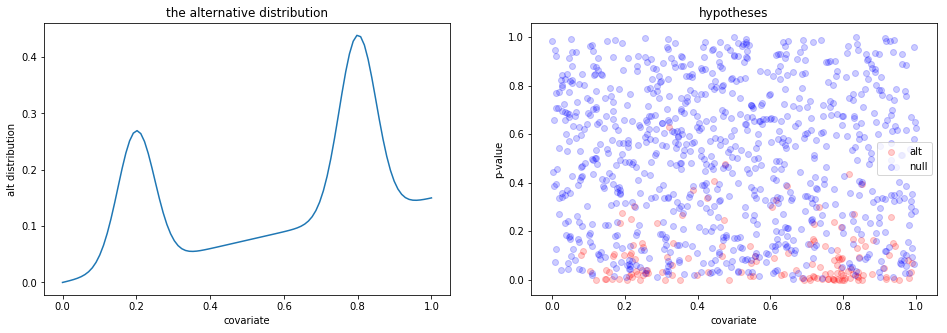

### bh summary ###
# rejections: 2829
rejection threshold: 0.00282551680216


FDP: 0.0855425945564 

### sbh summary ###
# rejections: 3258
rejection threshold: 0.00377852616633
null estimate: 0.861225


FDP: 0.0991405770411



In [10]:
## generating a 1d toy data 
p,x,h=toy_data_1d(n_sample=100000,vis=1)

## testing the BH method
n_rej,t_rej=bh(p,alpha=0.1,verbose=True)
print('FDP: %s \n'%str( np.sum((h==0)*(p<t_rej)/np.sum(p<t_rej))))

## testing the Storey BH method
n_rej,t_rej,pi0_hat=storey_bh(p,alpha=0.1,verbose=True)
print('FDP: %s\n'%str( np.sum((h==0)*(p<t_rej)/np.sum(p<t_rej))))

### Some derivations for the implementation of ML\_init\_1d ###
The slope function can be written as 
\begin{equation}
f(x;a) = \frac{a}{e^a-1} e^{ax}.
\end{equation}
Then the likihood function, with sample weight, can be written as 
\begin{equation}
l(x;a) = \sum_{i=1}^n w_i \left( ax_i + \log \frac{a}{e^a-1} \right) = a \sum_i w_i x_i + \sum_i w_i \log \frac{a}{e^a-1}. 
\end{equation}
We add a regularization factor to have 
\begin{equation}
l(x;a) = \sum_{i=1}^n w_i \left( ax_i + \log \frac{a}{e^a-1} + 0.005 a^2\right) = a \sum_i w_i x_i + \sum_i w_i \left( \log \frac{a}{e^a-1} + 0.005a^2 \right). 
\end{equation}
Hence the maximum likelihood estimate satisfies 
\begin{equation}
\frac{\log \frac{e^{\hat{a}}-1}{\hat{a}}+0.005\hat{a}^2 }{\hat{a}} = \frac{\sum_i w_i x_i}{\sum_i w_i}
\end{equation}

### Some technical consideration of the slope function ###

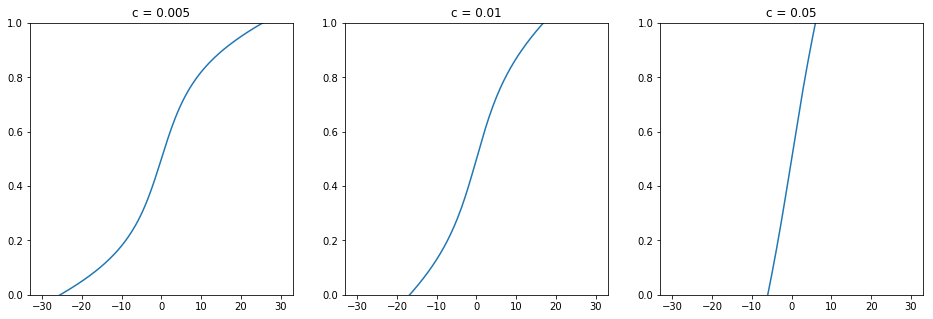

In [11]:
temp=np.linspace(-30,30,200)
c=[0.005,0.01,0.05]
plt.figure(figsize=[16,5])
for i in range(3):
    plt.subplot('13'+str(i+1))
    plt.plot(temp,(np.log((np.exp(temp)-1)/temp)+c[i]*temp**2)/temp)
    plt.ylim([0,1])
    plt.title('c = %s'%str(c[i]))
plt.show()

## ML initialization starts ##


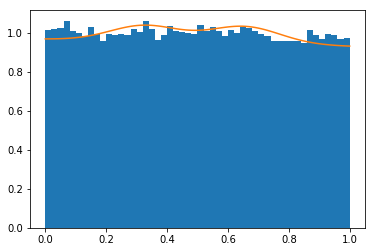

## Learned parameters for null population ##
Slope: w=0.950375409995, a=-0.0388330078125
Bump 0: w=0.0235085977966, mu=[ 0.32737675], sigma=[ 0.11406362]
Bump 1: w=0.0261159922081, mu=[ 0.65344395], sigma=[ 0.11723996]




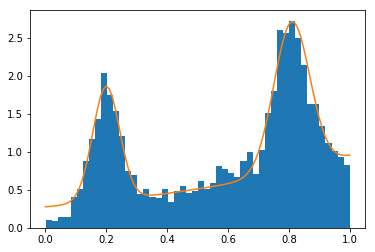

## Learned parameters ##
Slope: w=0.544080889721, a=1.2305810546874998
Bump 0: w=0.166973194387, mu=[ 0.19970072], sigma=[ 0.044172]
Bump 1: w=0.288945915891, mu=[ 0.80967721], sigma=[ 0.05877191]


## Testing Summary ##
Num of alternatives: 14400
Num of discovery: 4331
Num of true discovery: 3879
Actual FDP: 0.104363888248




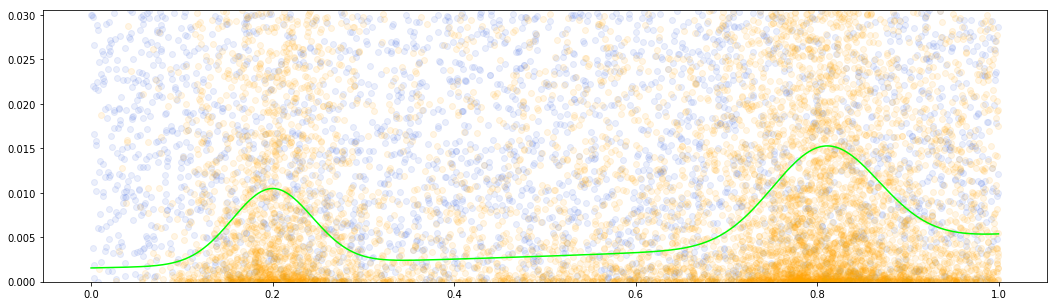

In [35]:
## testing the initialization 
w,a,mu,sigma = ML_init(p,x,2,alpha=0.1,n_itr=100,h=h,verbose=True)

### Parameters
n_itr=5000, n_samp=100000, lambda0=353.917555626, lambda1=100.0
### ML initialization starts ###



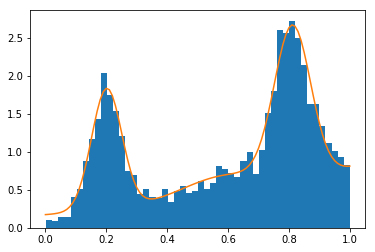

## Learned parameters: ##
Slope: w=0.407171674066, a=1.5235205078125
Bump 0: w=0.198528349618, mu=[ 0.20137257], sigma=[ 0.0497243]
Bump 1: w=0.300049802699, mu=[ 0.81178233], sigma=[ 0.05989616]
Bump 2: w=0.094250173617, mu=[ 0.58438523], sigma=[ 0.14017545]


## Summary before optimization ##
## Testing Summary ##
Num of alternatives: 14400
Num of discovery: 4293
Num of true discovery: 3855
Actual FDP: 0.102026554857


### initialization value ###
Slope: a=[ 1.52352047], b=[-7.59938288]
Bump 0: w=-5.37869, mu=[ 0.20137258], sigma=[ 0.00494501]
Bump 1: w=-5.1518, mu=[ 0.8117823], sigma=[ 0.0071751]
Bump 2: w=-7.16007, mu=[ 0.58438522], sigma=[ 0.03929831]


exp: complete:  0.00609 seconds
backprop: complete:  0.01018 seconds
whole: complete:  0.02260 seconds
### iteration 0 ###
mean t:  0.00289917
mean discovery:  0.03229
loss1:  [-0.02994219]
loss2:  [ 0.]
n_rej:  3229
Estimated FDP: [ 0.09682558]
FDP: 0.0715391762155
Slope: a=[ 1.52402043], b=[-7.59888268]
Bump 0: w=-5.37819, mu=[ 0

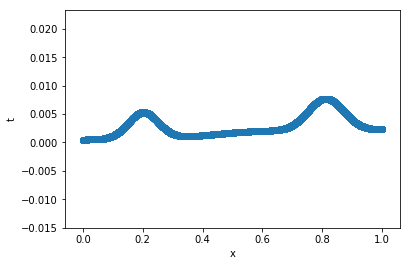



exp: complete:  0.00592 seconds
backprop: complete:  0.00978 seconds
whole: complete:  0.02186 seconds
exp: complete:  0.00594 seconds
backprop: complete:  0.00995 seconds
whole: complete:  0.02202 seconds
exp: complete:  0.00613 seconds
backprop: complete:  0.00983 seconds
whole: complete:  0.02220 seconds
exp: complete:  0.00562 seconds
backprop: complete:  0.00797 seconds
whole: complete:  0.01836 seconds
exp: complete:  0.00401 seconds
backprop: complete:  0.00997 seconds
whole: complete:  0.01884 seconds
exp: complete:  0.00607 seconds
backprop: complete:  0.00994 seconds
whole: complete:  0.02202 seconds
exp: complete:  0.00612 seconds
backprop: complete:  0.00955 seconds
whole: complete:  0.02172 seconds
exp: complete:  0.00605 seconds
backprop: complete:  0.01000 seconds
whole: complete:  0.02217 seconds
exp: complete:  0.00611 seconds
backprop: complete:  0.00992 seconds
whole: complete:  0.02218 seconds
exp: complete:  0.00610 seconds
backprop: complete:  0.00974 seconds
wh

backprop: complete:  0.01434 seconds
whole: complete:  0.02671 seconds
exp: complete:  0.00601 seconds
backprop: complete:  0.01144 seconds
whole: complete:  0.02397 seconds
exp: complete:  0.00606 seconds
backprop: complete:  0.01108 seconds
whole: complete:  0.02352 seconds
exp: complete:  0.00601 seconds
backprop: complete:  0.01071 seconds
whole: complete:  0.02621 seconds
exp: complete:  0.00945 seconds
backprop: complete:  0.01101 seconds
whole: complete:  0.02659 seconds
exp: complete:  0.00546 seconds
backprop: complete:  0.01011 seconds
whole: complete:  0.02023 seconds
exp: complete:  0.00407 seconds
backprop: complete:  0.00926 seconds
whole: complete:  0.01751 seconds
exp: complete:  0.00606 seconds
backprop: complete:  0.01134 seconds
whole: complete:  0.02325 seconds
exp: complete:  0.00601 seconds
backprop: complete:  0.01011 seconds
whole: complete:  0.02211 seconds
exp: complete:  0.00612 seconds
backprop: complete:  0.01123 seconds
whole: complete:  0.02689 seconds
ex

backprop: complete:  0.01196 seconds
whole: complete:  0.02879 seconds
exp: complete:  0.00548 seconds
backprop: complete:  0.01288 seconds
whole: complete:  0.02538 seconds
exp: complete:  0.00614 seconds
backprop: complete:  0.01142 seconds
whole: complete:  0.02374 seconds
exp: complete:  0.00405 seconds
backprop: complete:  0.01158 seconds
whole: complete:  0.01988 seconds
exp: complete:  0.00610 seconds
backprop: complete:  0.01226 seconds
whole: complete:  0.02467 seconds
exp: complete:  0.00619 seconds
backprop: complete:  0.01319 seconds
whole: complete:  0.02565 seconds
exp: complete:  0.00481 seconds
backprop: complete:  0.01199 seconds
whole: complete:  0.02228 seconds
exp: complete:  0.00609 seconds
backprop: complete:  0.01205 seconds
whole: complete:  0.02434 seconds
exp: complete:  0.00914 seconds
backprop: complete:  0.01235 seconds
whole: complete:  0.03148 seconds
exp: complete:  0.00613 seconds
backprop: complete:  0.01203 seconds
whole: complete:  0.02425 seconds
ex

backprop: complete:  0.01414 seconds
whole: complete:  0.02635 seconds
exp: complete:  0.00606 seconds
backprop: complete:  0.01357 seconds
whole: complete:  0.02568 seconds
exp: complete:  0.00605 seconds
backprop: complete:  0.01316 seconds
whole: complete:  0.02525 seconds
exp: complete:  0.00605 seconds
backprop: complete:  0.02279 seconds
whole: complete:  0.03518 seconds
exp: complete:  0.00597 seconds
backprop: complete:  0.01013 seconds
whole: complete:  0.02087 seconds
exp: complete:  0.00565 seconds
backprop: complete:  0.01280 seconds
whole: complete:  0.02427 seconds
exp: complete:  0.00619 seconds
backprop: complete:  0.01122 seconds
whole: complete:  0.02299 seconds
exp: complete:  0.00469 seconds
backprop: complete:  0.01344 seconds
whole: complete:  0.02271 seconds
exp: complete:  0.00401 seconds
backprop: complete:  0.01080 seconds
whole: complete:  0.01921 seconds
exp: complete:  0.00611 seconds
backprop: complete:  0.01371 seconds
whole: complete:  0.02555 seconds
ex

backprop: complete:  0.01425 seconds
whole: complete:  0.02641 seconds
exp: complete:  0.00609 seconds
backprop: complete:  0.01410 seconds
whole: complete:  0.02618 seconds
exp: complete:  0.00607 seconds
backprop: complete:  0.01428 seconds
whole: complete:  0.02656 seconds
exp: complete:  0.00598 seconds
backprop: complete:  0.01412 seconds
whole: complete:  0.02642 seconds
exp: complete:  0.00607 seconds
backprop: complete:  0.01517 seconds
whole: complete:  0.02750 seconds
exp: complete:  0.00613 seconds
backprop: complete:  0.01407 seconds
whole: complete:  0.02649 seconds
exp: complete:  0.00606 seconds
backprop: complete:  0.01450 seconds
whole: complete:  0.02676 seconds
exp: complete:  0.00607 seconds
backprop: complete:  0.01492 seconds
whole: complete:  0.03057 seconds
exp: complete:  0.00608 seconds
backprop: complete:  0.01727 seconds
whole: complete:  0.02963 seconds
exp: complete:  0.00606 seconds
backprop: complete:  0.01330 seconds
whole: complete:  0.02533 seconds
ex

backprop: complete:  0.01716 seconds
whole: complete:  0.02949 seconds
exp: complete:  0.00607 seconds
backprop: complete:  0.01580 seconds
whole: complete:  0.02803 seconds
exp: complete:  0.00610 seconds
backprop: complete:  0.01578 seconds
whole: complete:  0.02801 seconds
exp: complete:  0.00755 seconds
backprop: complete:  0.01968 seconds
whole: complete:  0.03345 seconds
exp: complete:  0.00606 seconds
backprop: complete:  0.01550 seconds
whole: complete:  0.02943 seconds
exp: complete:  0.00611 seconds
backprop: complete:  0.01743 seconds
whole: complete:  0.03221 seconds
exp: complete:  0.00591 seconds
backprop: complete:  0.01622 seconds
whole: complete:  0.02811 seconds
exp: complete:  0.00477 seconds
backprop: complete:  0.02030 seconds
whole: complete:  0.03241 seconds
exp: complete:  0.00538 seconds
backprop: complete:  0.01501 seconds
whole: complete:  0.02504 seconds
exp: complete:  0.00429 seconds
backprop: complete:  0.02145 seconds
whole: complete:  0.03022 seconds
ex

exp: complete:  0.00607 seconds
backprop: complete:  0.01659 seconds
whole: complete:  0.03808 seconds
exp: complete:  0.00608 seconds
backprop: complete:  0.01835 seconds
whole: complete:  0.03400 seconds
exp: complete:  0.00593 seconds
backprop: complete:  0.01538 seconds
whole: complete:  0.02723 seconds
exp: complete:  0.00595 seconds
backprop: complete:  0.01580 seconds
whole: complete:  0.03408 seconds
exp: complete:  0.00543 seconds
backprop: complete:  0.02228 seconds
whole: complete:  0.03339 seconds
exp: complete:  0.00607 seconds
backprop: complete:  0.01653 seconds
whole: complete:  0.03069 seconds
exp: complete:  0.00604 seconds
backprop: complete:  0.01641 seconds
whole: complete:  0.02866 seconds
exp: complete:  0.00413 seconds
backprop: complete:  0.01414 seconds
whole: complete:  0.02315 seconds
exp: complete:  0.00610 seconds
backprop: complete:  0.01702 seconds
whole: complete:  0.02920 seconds
exp: complete:  0.00906 seconds
backprop: complete:  0.01615 seconds
whol

KeyboardInterrupt: 

In [24]:
## test prim_fdr
n_rej,t=PrimFDR(p,x,3,alpha=0.1,h=h,verbose=True)
print("### Summary ###")
print("method: perim_test_1d")
print("# rejections: %s"%str(n_rej))
print("FDP: %s"%str( np.sum((h==0)*(p<t))/np.sum(p<t)))
print("### End Summary ###")

In [ ]:
27*6